In [81]:
import nbsetup
import ensemblepy as ep

import numpy as np
import seaborn as sns
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [176]:
def mixed(percent, count=5000):
    p = int(count*(1-percent))
    if p == count: 
        return np.ones(count)
    elif p == 0:
        return np.linspace(0, 1, count)
    else:
        return np.concatenate([np.ones(p), np.linspace(0, 1, count-p)])

def mixed(percent, count=5000):
    p = int(count*(1-percent))
    if p == count: 
        return np.random.normal(0.5, 0.01, count)
    elif p == 0:
        return np.random.uniform(0, 1, count)
    else:
        return np.concatenate([np.random.normal(0.5, 0.01, p), np.random.uniform(0, 1, count-p)])

def mixed(percent, count=5000):
    return np.random.normal(0.5, 1/(0.0001+percent), count)

In [177]:
def discrete_entropy(dist, b):
    bins = np.linspace(min(0,dist.min()),max(1, dist.max()),b+1)
    hist, _ = np.histogram(dist, bins)
    entropy = sp.stats.entropy(hist, base=2)
    max_ent = np.log2(b)
    return entropy, max_ent, sp.stats.entropy(hist, np.ones(b)/b)

In [178]:
x = np.linspace(0,1,10)
doto = []
for i in x:
    dist = mixed(i)
    #doto.append({
    #    'x': i,
    #    'density': ep.density_variance(dist),
    #    'hue': 0,
    #})
    for b in range(2,100):
        entropy, max_ent, jaynes = discrete_entropy(dist, b)
        doto.append({
            'x': i,
            'entropy': entropy,
            'jaynes': jaynes, # or can use ,
            'div': entropy/max_ent,
            'diff': -sp.stats.differential_entropy(dist),
            'hue': b,
        })

doto = pd.DataFrame(doto)

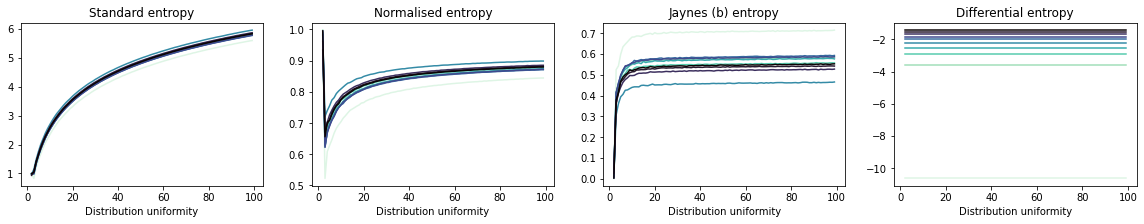

In [179]:
fig, axes = plt.subplots(1, 4, sharex=True, figsize=(20,3))
compares = (('entropy', 'Standard entropy'),
        ('div', 'Normalised entropy'),
          ('jaynes', 'Jaynes (b) entropy'),
           ('diff', 'Differential entropy'))
for i, lt in enumerate(compares):
    sns.lineplot(data=doto, x='hue', y=lt[0], hue='x', ax=axes[i], legend=False, palette='mako_r').set(title=lt[1], ylabel=None, xlabel='Distribution uniformity')
    #sns.lineplot(data=doto, x='x', y=lt[0], hue='hue', ax=axes[i], legend=False, palette='mako_r').set(title=lt[1], ylabel=None, xlabel='Distribution uniformity')
    #sns.lineplot(data=doto, x='x', y='density', ax=axes[i], linestyle='dotted', color='red').set(ylabel='Entropy (bits)')

fig.savefig('comparison.eps')

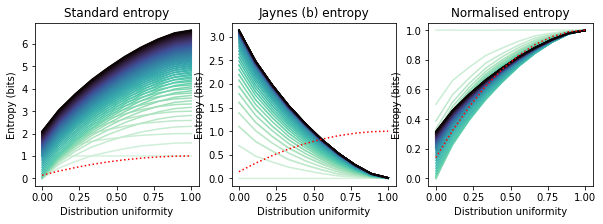

In [170]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,3))
compares = (('entropy', 'Standard entropy'),
          ('jaynes', 'Jaynes (b) entropy'),
          ('div', 'Normalised entropy'))
for i, lt in enumerate(compares):
    sns.lineplot(data=doto, x='x', y=lt[0], hue='hue', ax=axes[i], legend=False, palette='mako_r').set(title=lt[1], ylabel=None, xlabel='Distribution uniformity')
    sns.lineplot(data=doto, x='x', y='density', ax=axes[i], linestyle='dotted', color='red').set(ylabel='Entropy (bits)')

fig.savefig('comparison.eps')

/Users/timjdavey/Projects/complexity/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


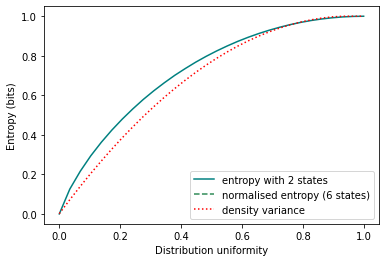

In [95]:
sns.lineplot(x=doto['x'], y=doto[doto['hue']==2]['entropy'], label='entropy with 2 states', color='teal')
sns.lineplot(x=doto['x'], y=doto[doto['hue']==9]['div'], label='normalised entropy (6 states)', color='seagreen', linestyle='dashed')
g = sns.lineplot(x=doto['x'], y=doto['density'], color='red', linestyle='dotted', label='density variance')
g.set(xlabel='Distribution uniformity', ylabel='Entropy (bits)')
g.get_figure().savefig('baseline.eps')

In [235]:
a, b = doto[doto['hue']==99]['div'].to_numpy(), doto[doto['hue']==2]['div'].to_numpy()
(b-a).mean(), (b-a).max()

(0.11521664676380572, 0.18282413755139415)

In [236]:
a, b = doto[doto['hue']==6]['div'].to_numpy(), doto[doto['density'].notna()]['density'].to_numpy()
(b-a).mean(), (b-a).max()

(0.0016548744422603054, 0.024732104113727393)

In [7]:
data = {'obs':[], 'steps': [], 'k': []}

for i in x:
    # observations
    for o in range(20, 100, 10):
        data['obs'].append({
            'x': i,
            'y': ep.density_variance(mixed(i, count=o)),
            'spread': o,
        })
    dist = mixed(i)
    # steps
    for s in range(100, 1000, 200):
        data['steps'].append({
            'x': i,
            'y': ep.density_variance(dist, steps=s),
            'spread': s,
        })
    # k
    for k in range(20, 80, 20):
        data['k'].append({
            'x': i,
            'y': ep.density_variance(dist, k=k, bounded=False),
            'spread': k,
        })

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


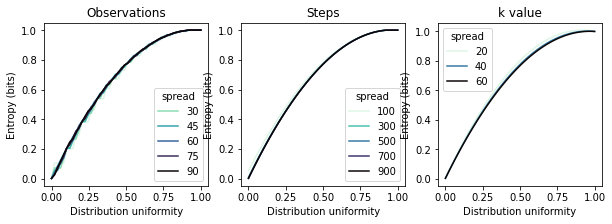

In [267]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(10,3))
compares = (('obs', 'Observations'),
          ('steps', 'Steps'),
          ('k', 'k value'))
for i, lt in enumerate(compares):
    sns.lineplot(data=pd.DataFrame(data[lt[0]]), x='x', y='y', hue='spread', ax=axes[i], palette='mako_r').set(title=lt[1], ylabel='Entropy (bits)', xlabel='Distribution uniformity')

fig.savefig('invariance.eps')

In [264]:
def continuous_against_discrete(dist, ax=None, title=None, legend=True):
    data = []

    x = range(2, 60)
    for b in x:
        entropy, max_ent, jaynes = discrete_entropy(dist, b)
        diff = sp.stats.differential_entropy(dist)
        dv = ep.density_variance(dist)
        
        data.append({
            'states': b,
            'standard entropy': entropy,
            'maximum entropy': max_ent,
            'normalised': entropy/max_ent,
            'density variance': dv,
            'jaynes (a)': max_ent-jaynes,
            'jaynes (b)': jaynes,
            'differential': diff,
        })
    data = pd.DataFrame(data).melt(id_vars='states', var_name='measure')
    g = sns.lineplot(data=data, x='states', y='value', hue='measure', ax=ax, legend=legend).set(ylabel='Entropy (bits)', xlabel='Number of discrete states', title=title)
    return data

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


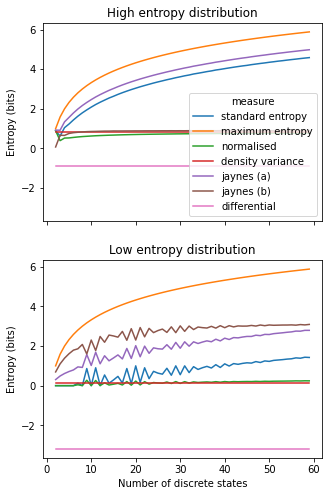

In [265]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(5, 8))
high = continuous_against_discrete(np.random.normal(0.45, 0.1, 5000), axes[0], 'High entropy distribution')
low = continuous_against_discrete(np.random.normal(0.45, 0.01, 5000), axes[1], 'Low entropy distribution', False)
fig.savefig('demonstration.eps')

In [275]:
close = np.concatenate([np.ones(100)*0.8, np.ones(100)*0.85])
far = np.concatenate([np.ones(100)*0.8, np.ones(100)*0.2])
close50 = discrete_entropy(close, 50)
far50 = discrete_entropy(far, 50)
close5 = discrete_entropy(close, 5)
far5 = discrete_entropy(far,5)
ep.density_variance(close), ep.density_variance(far), close50[0]/close50[1], far50[0]/far50[1], close5[0]/close5[1], far5[0]/far5[1]


(0.38749531119386127,
 0.5430717884497915,
 0.17718382013555792,
 0.17718382013555792,
 0.0,
 0.43067655807339306)